# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2024-11-14 04:28:07--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2024-11-14 04:28:07--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
# Resumen del conjunto de datos

# Contar la cantidad de tweets por etiqueta


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [9]:

data.info()

data["Label"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


,count
Label,
non-biased,1596
biased,318


In [10]:
tipos=data["Label"].value_counts()
divición=tipos/len(data)
divición

,count
Label,
non-biased,0.833856
biased,0.166144


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto

In [ ]:


# Aplicar la limpieza de texto


In [11]:

def limpiar_data(data):
    data = data.lower()
    data = re.sub(r'[^\w\s]', '', data)
    palabras = data.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [ ]:


# Contar palabras


# Visualización de frecuencia de palabras



In [12]:

def contar_palabras(data):
    palabras = limpiar_data(data)
    return Counter(palabras)
data['word_counts'] = data['Contents'].apply(contar_palabras)


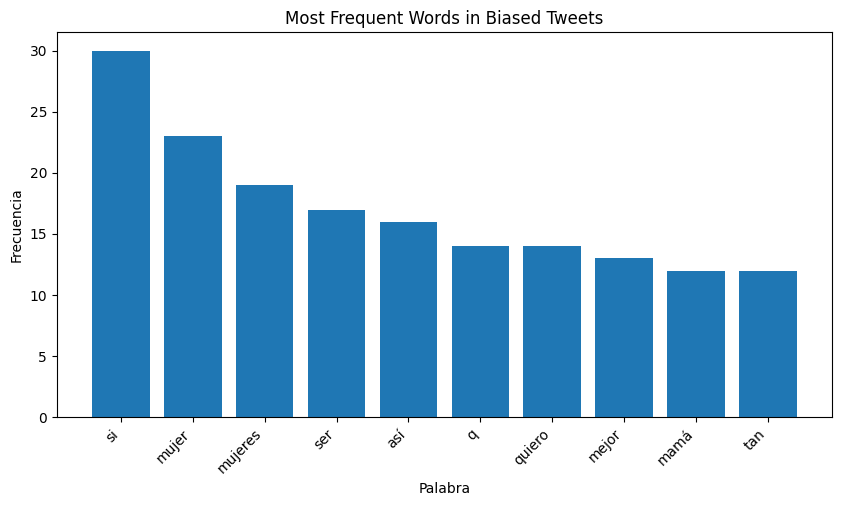

In [13]:
biased_word_counts = data[data['Label'] == 'biased']['word_counts'].sum()
non_biased_word_counts = data[data['Label'] == 'non-biased']['word_counts'].sum()

biased_df = pd.DataFrame(biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
non_biased_df = pd.DataFrame(non_biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

import matplotlib.pyplot as plt

top_biased_words = biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_biased_words['Word'], top_biased_words['Count'])
plt.title('Most Frequent Words in Biased Tweets')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

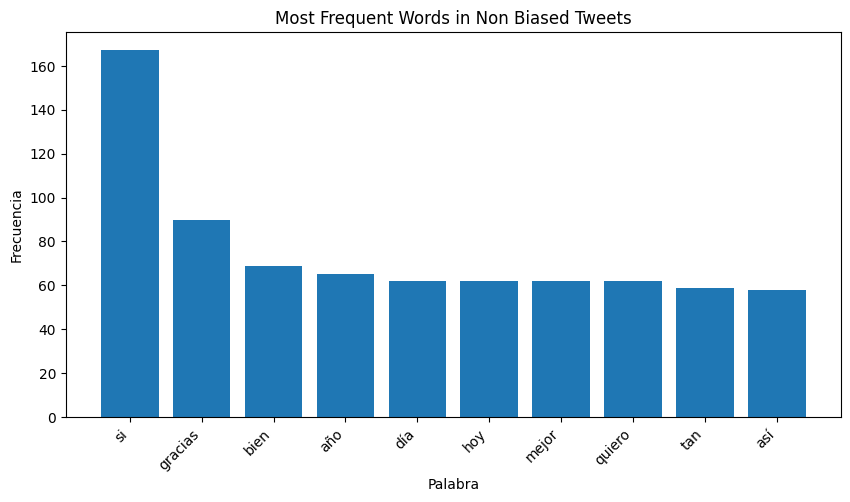

In [14]:

top_non_biased_words = non_biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_non_biased_words['Word'], top_non_biased_words['Count'])
plt.title('Most Frequent Words in Non Biased Tweets')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

In [ ]:
# ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
# ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
# ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas? describelo en texto no codigo responde las preguntas ponle el # a todo par que lo lea como texto

# ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?

# Para responder a esta pregunta, debemos analizar las listas de palabras más frecuentes en ambos tipos de tweets. Al observar el top 10 de palabras en los tweets etiquetados como "biased" y "non-biased" (que se pueden visualizar con los gráficos generados por el código) se identifican las palabras más comunes en cada caso.


#  ## Palabras que sugieren un sesgo en los tweets etiquetados como 'biased'
#
# # Para identificar palabras que sugieran un sesgo, se debe buscar aquellas que aparezcan con mayor frecuencia en los tweets etiquetados como 'biased' y que no sean tan frecuentes en los 'non-biased'.
#
# # Por ejemplo, si encontramos palabras relacionadas con estereotipos, generalizaciones, o términos que denoten juicios de valor hacia un grupo específico, podríamos concluir que esas palabras están contribuyendo a un sesgo en los tweets.
#
# # Se recomienda revisar el contexto en el que aparecen esas palabras en los tweets para confirmar si realmente están expresando un sesgo.


# ## ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?
#
# # Al analizar la frecuencia de palabras en los tweets etiquetados como 'biased', las empresas pueden obtener información valiosa sobre:
#
# # 1. Identificar temas o grupos que generan opiniones sesgadas.
# # 2. Detectar patrones o tendencias en los sesgos, como la aparición de estereotipos o prejuicios.
# # 3. Comprender mejor la naturaleza y el alcance de las opiniones sesgadas sobre sus productos o servicios.
# # 4. Evaluar la reputación de su marca y la percepción que tienen los consumidores sobre ella.
# # 5. Mejorar su estrategia de marketing y comunicación con información valiosa para abordar las opiniones sesgadas y fortalecer la imagen de su marca.
# # 6. Diseñar estrategias para mitigar los sesgos y promover un diálogo más objetivo y respetuoso.
#
# # En resumen, el análisis de frecuencia de palabras en tweets puede brindar a las empresas un entendimiento profundo de las opiniones sesgadas, lo que las puede ayudar a mejorar su gestión de la reputación y sus estrategias de comunicación.


5. Analisis de sentimientos


In [15]:
from textblob import TextBlob

def analizar_sentimiento(data):

    if isinstance(data, str):
        blob = TextBlob(data)
        return blob.sentiment.polarity
    else:
        return None  # En caso de que el texto no sea una cadena, devolvemos None

data['sentimiento'] = data['Contents'].apply(analizar_sentimiento)

# Ver el resultado
print(data[['Contents', 'sentimiento']])

                                               Contents  sentimiento
0     @chumeltorres ya cabrón! sin tí se reciben las...          0.0
1     ¿alguien es tan amable de ir a hacerme la comp...          0.0
2     @jenniferduquee hahaha, si está rico, nadamas ...          0.2
3     @evagelcot donde lo ves!!? es mi programa favo...          0.0
4     como siempre mi tortilla triunfa mas que otros...          0.0
...                                                 ...          ...
1909  iba a ir a dash pero mis 3 cortadas, mi color ...          0.0
1910  que pinche chiste tiene estar medio alto si to...          0.0
1911  si fuera bien idiota. ya hubiera comprado un a...          0.0
1912  nota mental: no le quieras ayudar a alguien qu...         -0.1
1913  vamos @arvenlol, dales duro como tú sabes  #lo...          0.0

[1914 rows x 2 columns]


             count      mean       std  min  25%  50%  75%  max
Label                                                          
biased       318.0  0.001232  0.128171 -1.0  0.0  0.0  0.0  0.8
non-biased  1596.0  0.001849  0.111932 -1.0  0.0  0.0  0.0  1.0


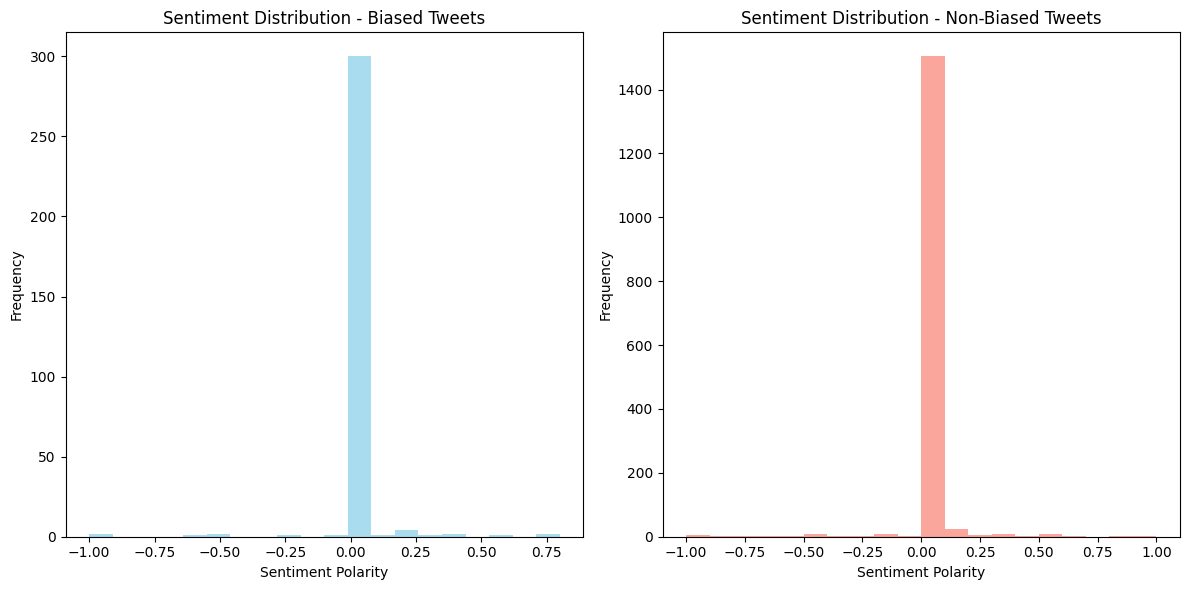

<Figure size 800x600 with 0 Axes>

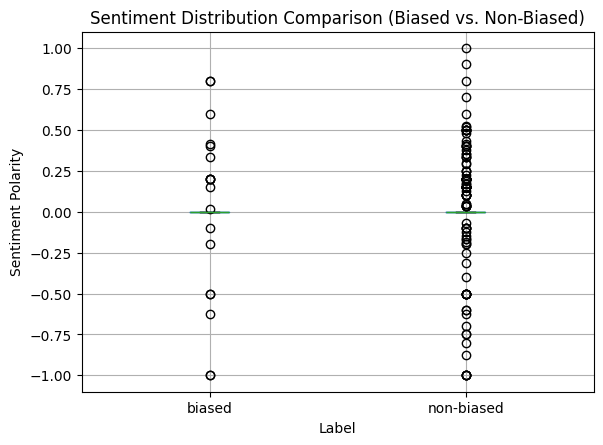

In [16]:
# Group data by 'Label' and calculate sentiment distribution statistics
sentiment_distribution = data.groupby('Label')['sentimiento'].describe()

# Print the distribution
print(sentiment_distribution)

# Plotting Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data[data['Label'] == 'biased']['sentimiento'], bins=20, color='skyblue', alpha=0.7)
plt.title('Sentiment Distribution - Biased Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data[data['Label'] == 'non-biased']['sentimiento'], bins=20, color='salmon', alpha=0.7)
plt.title('Sentiment Distribution - Non-Biased Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplot comparison
plt.figure(figsize=(8, 6))
data.boxplot(column='sentimiento', by='Label')
plt.title('Sentiment Distribution Comparison (Biased vs. Non-Biased)')
plt.suptitle('')  # Remove the default boxplot title
plt.ylabel('Sentiment Polarity')
plt.show()


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [ ]:
## Cree una funcion para geenrar nube de palabras

In [ ]:


# Generar nube de palabras para cada conjunto



In [ ]:
# NO biased nube de palabras


In [18]:

data['cleaned_Contents'] = data['Contents'].apply(limpiar_data)
def generar_nube_palabras(texto):
    # Unir todas las listas de palabras limpias en un solo string
    palabras = ' '.join([palabra for lista in texto for palabra in lista])  # Aplanamos la lista de listas
    # Generamos la nube de palabras
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    # Mostramos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')  # No mostrar los ejes
    plt.show()



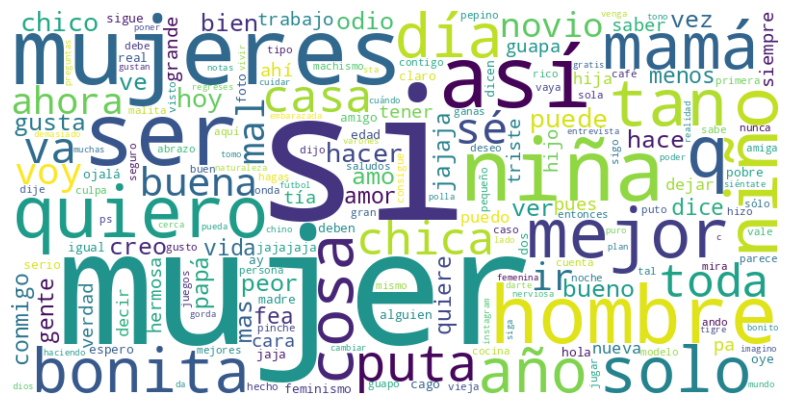

In [19]:
biased_texts = data[data['Label'] == 'biased']['cleaned_Contents']
generar_nube_palabras(biased_texts)

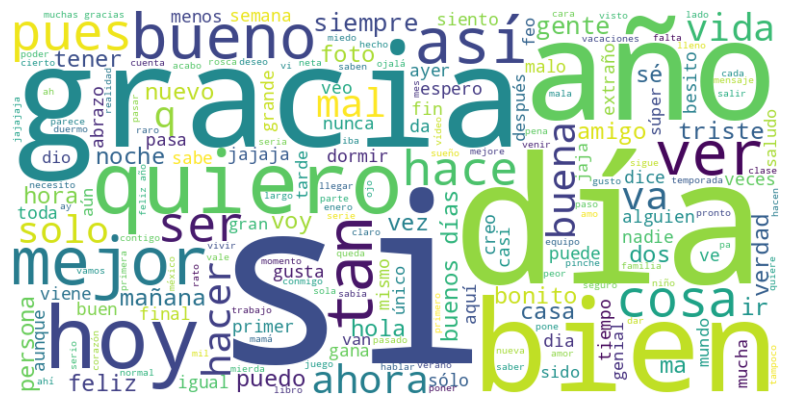

In [20]:

non_biased_texts = data[data['Label'] == 'non-biased']['cleaned_Contents']
generar_nube_palabras(non_biased_texts)


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

#¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
# ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
# ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

# ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

# El análisis de texto de los tweets, especialmente en relación con el sesgo, puede ser una herramienta poderosa para mejorar la comunicación de una marca. Al entender qué temas y palabras generan opiniones sesgadas, la marca puede:

# 1. **Ajustar su estrategia de contenido:** Evitar el uso de lenguaje que pueda perpetuar estereotipos o generar reacciones negativas en ciertos grupos.
# 2. **Monitorear la reputación de la marca:** Detectar si hay menciones que puedan dañar la imagen de la marca debido a sesgos o comentarios negativos.
# 3. **Mejorar la interacción con los usuarios:** Entender los sesgos existentes permite responder de forma más adecuada y empática a las preocupaciones de los clientes.
# 4. **Crear campañas más inclusivas:** Dirigir campañas de marketing que sean más respetuosas y consideren las perspectivas de diferentes grupos.
# 5. **Generar contenido más relevante:** Diseñar contenido que atienda las necesidades e intereses de la audiencia, considerando los posibles sesgos existentes.


# ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

# Si se identifica que los tweets relacionados con una campaña de marketing son predominantemente 'biased', se deben considerar los siguientes ajustes:

# 1. **Revisión y reajuste del mensaje principal:** Buscar un lenguaje más neutral y evitar cualquier expresión que pueda perpetuar estereotipos o generar sesgos.
# 2. **Diversificación de la estrategia de contenido:** Incluir contenido que represente diferentes perspectivas y puntos de vista, promoviendo la inclusión y la diversidad.
# 3. **Monitoreo de los comentarios y menciones:** Dar seguimiento a los comentarios y menciones en redes sociales para identificar cualquier sesgo que pueda estar apareciendo en el contexto de la campaña.
# 4. **Adaptación del lenguaje y tono:** Ajustar el lenguaje y tono de la campaña para que sea más apropiado y respetuoso con la audiencia objetivo.
# 5. **Colaboración con grupos influyentes:** Encontrar influenciadores que puedan ayudar a promover el mensaje de la campaña de forma responsable y sin perpetuar sesgos.


# ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

# En un análisis futuro se pueden explorar los siguientes patrones importantes:

# 1. **Análisis de tendencias a lo largo del tiempo:** Observar cómo cambia el sentimiento y el sesgo en los tweets relacionados con una marca, un producto o un tema específico a lo largo del tiempo. Esto puede ayudar a identificar cambios en la opinión pública y en la percepción de la marca.
# 2. **Análisis de relaciones entre diferentes usuarios:** Examinar cómo las interacciones y los retweets entre los usuarios se relacionan con la presencia de sesgos en los tweets. Esto puede ayudar a entender la dinámica de la conversación y las comunidades que se forman en torno a temas específicos.
# 3. **Identificación de influenciadores clave:** Analizar quiénes son los usuarios más influyentes en las conversaciones relacionadas con el sesgo y su influencia en la opinión pública.
# 4. **Análisis de la correlación entre el sesgo y el sentimiento:** Investigar si existe una relación entre el sesgo en los tweets y el sentimiento expresado en los mismos. Por ejemplo, ¿están los tweets con sesgos más propensos a generar emociones negativas?
# 5. **Análisis de la presencia de diferentes tipos de sesgos:** Identificar los diferentes tipos de sesgos presentes en los tweets, como el sesgo de género, sesgo racial, sesgo político, etc. Esto puede ayudar a crear estrategias más específicas para abordar diferentes tipos de sesgos en la comunicación de una marca.